In [29]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import fashion_mnist
from keras.utils.np_utils import to_categorical
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

In [25]:
(x_treino, y_treino), (x_teste, y_teste) = fashion_mnist.load_data()
x_treino.shape, y_treino.shape

((60000, 28, 28), (60000,))

In [26]:
y_treino = to_categorical(y_treino)
y_teste = to_categorical(y_teste)

In [7]:
x_treino_normalizado = x_treino/255.0
x_teste_normalizado = x_teste/255.0
x_treino_normalizado= x_treino_normalizado.reshape(60000,28,28,1)
x_teste_normalizado=x_teste_normalizado.reshape(10000,28,28,1)
x_treino_normalizado.shape, x_teste_normalizado.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [11]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(80,kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,kernel_initializer='glorot_uniform', activation='softmax'))

otimizador = Adam()

model.compile(otimizador,loss='categorical_crossentropy', metrics=['acc'])

In [15]:
au_date = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
x_transformado = au_date.flow(x_treino_normalizado,y_treino, batch_size=200)
n_passos = int(x_treino.shape[0]/200)

In [18]:
historico = model.fit_generator(x_transformado,epochs=60,steps_per_epoch=n_passos,validation_data=(x_teste_normalizado,y_teste), verbose=1)

Epoch 1/60
300/300 [==============================] - 47s 155ms/step - loss: 0.6049 - acc: 0.7686 - val_loss: 0.4800 - val_acc: 0.8154
Epoch 2/60
300/300 [==============================] - 43s 143ms/step - loss: 0.5373 - acc: 0.7979 - val_loss: 0.4179 - val_acc: 0.8415
Epoch 3/60
300/300 [==============================] - 43s 144ms/step - loss: 0.4913 - acc: 0.8172 - val_loss: 0.3861 - val_acc: 0.8552
Epoch 4/60
300/300 [==============================] - 44s 145ms/step - loss: 0.4551 - acc: 0.8321 - val_loss: 0.3545 - val_acc: 0.8698
Epoch 5/60
300/300 [==============================] - 42s 142ms/step - loss: 0.4309 - acc: 0.8401 - val_loss: 0.3297 - val_acc: 0.8801
Epoch 6/60
300/300 [==============================] - 43s 145ms/step - loss: 0.4101 - acc: 0.8493 - val_loss: 0.3176 - val_acc: 0.8839
Epoch 7/60
300/300 [==============================] - 43s 143ms/step - loss: 0.3927 - acc: 0.8538 - val_loss: 0.3115 - val_acc: 0.8853
Epoch 8/60
300/300 [==============================] - 4

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

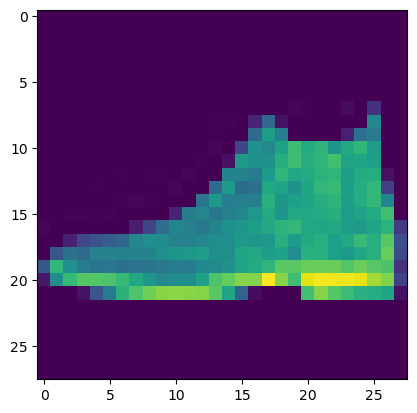

In [27]:
plt.imshow(x_teste[0])
y_teste[0]

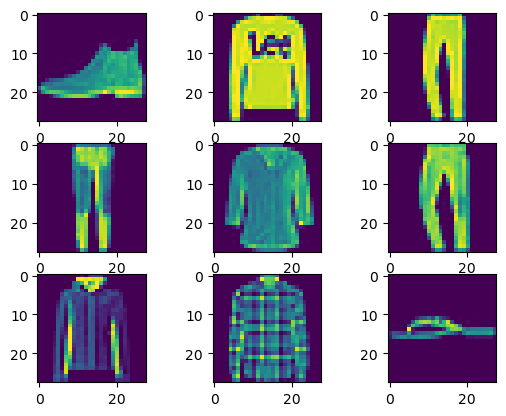

In [28]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_teste[i])

In [32]:
for i in range(9):
    a = x_teste[i].reshape(28,28,1)/255
    b = np.expand_dims(a,axis=0)
    print(model.predict_classes(b))

[9]
[2]
[1]
[1]
[6]
[1]
[4]
[6]
[5]
